

---
ASSIGNMENT 4 : PART 1


---



**Part 1 - Solution #1.A**

A short report on the various tags present in the code.
Each tag in HTML have a closing tag which describes the end of correponding section. For e.g. the <html> decribes the whole html content of the web page and has <\html> as it closing tag. This closing tag is used as an end of the html document.
e.g. \<body> has \<\body> closing tag.<br>
    
Description

**html**: Describes the complete content of the html webpage.<br>
**head**: Describes the heading portion of the page. In the url provided there are no heading mentioned.<br>
**body**: Describes the content or the body part of the html page or the Document.<br>
**h1**:  Heading Tag: Provides the heading for the html page - ECS766P Data Mining - Week 10. there are h1 to h6 tags.  <br>
**p1**:  Paragraph Tag: Provides a description for the html page.  <br>
**table**: Table Tag: creates a HTML table. The data in the table can be entered using the tr:Table Row and td:Table Data.<br>
**thead**:  Table Heading: Describes the header/label part of the table. This tag is used within the table tag.<br> 
**tbody**:  Table Body: Describes the body part or the main content of the table.  <br>
**tr**: Table Row: describes each row in the table. <br>
**th**: Table heading: describes the data to be entered for each column header. th is used within the tr tag.<br> 
**td**: Table Data: describes the data entered for each row. td is used within the tr tag.<br>

---

---
**Part 1 - Solution #1.B**

Below implementation scrapes the table and convert it into a pandas dataframe.




In [ ]:
!pip install wikipedia
!pip install statsmodels --upgrade

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import wikipedia
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from urllib.request import urlopen
from bs4 import BeautifulSoup
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
url = "http://eecs.qmul.ac.uk/~emmanouilb/income_table.html"
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')

# the 'tr' tag in html denotes a table row# Create an empty list where the table header will be stored
header_list = []
# Find the 'th' html tags which denote table header
col_labels = soup.find_all('th')
col_str = str(col_labels)
cleantext_header = BeautifulSoup(col_str, "lxml").get_text()  # extract the text without HTML tags
header_list.append(cleantext_header) # Add the clean table header to the list

# Create an empty list where the table will be stored
table_list = []
rows = soup.find_all('tr') 
# For every row in the table, find each cell element and add it to the list
for row in rows:
    row_td = row.find_all('td')
    row_cells = str(row_td)
    row_cleantext = BeautifulSoup(row_cells, "lxml").get_text()  # extract the text without HTML tags
    table_list.append(row_cleantext)  # Add the clean table row to the list
    

df_header = pd.DataFrame(header_list)
df_header = df_header[0].str.split(',', expand=True)
df_data = pd.DataFrame(table_list)
df_data = df_data[0].str.split(',', expand=True)

# Remove uneccessary characters from the header
df_header[0] = df_header[0].str.strip('[')
df_header[0] = df_header[0].str.strip(']')
df_header[3] = df_header[3].str.strip(']')
df_data[0] = df_data[0].str.strip('[')
df_data[3] = df_data[3].str.strip(']')


# Concatenate the two dataframes
frames = [df_header, df_data]
df = pd.concat(frames)

df2 = df.rename(columns=df.iloc[0]) # We assign the first row to be the dataframe header
df3 = df2.drop(df2.index[0]) # We drop the replicated header from the first row of the dataframe

display(df3)

,Region,Age,Income,Online Shopper
1,India,49,86400,No
2,Brazil,32,57600,Yes
3,USA,35,64800,No
4,Brazil,43,73200,No
5,USA,45,,Yes
6,India,40,69600,Yes
7,Brazil,,62400,No
8,India,53,94800,Yes
9,USA,55,99600,No
10,India,42,80400,Yes



---

**Part 1 - Solution #2**

Below implementation scrapes the the url and convert it into a pandas dataframe : http://eecs.qmul.ac.uk/postgraduate/programmes/.

In [108]:
url = "http://eecs.qmul.ac.uk/postgraduate/programmes/"
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')

header_list = []

# Find the 'th' html tags which denote table header
col_labels = soup.find_all('th')
col_str = str(col_labels)
cleantext_header = BeautifulSoup(col_str, "lxml").get_text()  # extract the text without HTML tags
## Add two new Column
cleantext_header += ',URL - Part-time(2 year)'
cleantext_header += ',URL - Full-time(1 year)'
header_list.append(cleantext_header) # Add the clean table header to the list

df_header = pd.DataFrame(header_list)
df_header = df_header[0].str.split(',', expand=True)
# We remove uneccessary characters from the header
df_header[0] = df_header[0].str.strip('[')
df_header[0] = df_header[0].str.strip(']')
df_header[2] = df_header[2].str.strip(']')


# the 'tr' tag in html denotes a table row# Create an empty list where the table header will be stored
rows = soup.find_all('tr')  
# Create an empty list where the table will be stored
table_list = []
# For every row in the table, find each cell element and add it to the list
for row in rows:
  rowData = []
  row_td = row.find_all('td')
  rowtd_cleantext = ""
  for data in row_td:

    # extract the text without HTML tags
    row_cell = str(data)
    row_cleantext = BeautifulSoup(row_cell, "lxml").get_text()
    link = data.find_all('a') 

    if len(link) == 0:
      row_cleantext += ','+''
    else:
      link = data.find('a') 
      l = link.get('href')
      row_cleantext += ','+l
    rowtd_cleantext += ','+row_cleantext
  
  rowtd_cleantext = rowtd_cleantext[1:]
  table_list.append(rowtd_cleantext)

table_list = table_list[1:]
df_data = pd.DataFrame(table_list)
df_data = df_data[0].str.split(',', expand=True)

df_data[1] = df_data[2]
df_data[2] = df_data[4]
df_data[4] = df_data[5]
df_data = df_data.drop(df_data.columns[5], axis=1)

df_final = df_data.rename(columns=df_header.iloc[0]) # We assign the first row to be the dataframe header
pd.set_option('display.width', 50)
pd.set_option('display.expand_frame_repr',True)

display(df_final)

,Postgraduate degree programmes,Part-time(2 year),Full-time(1 year),URL - Part-time(2 year),URL - Full-time(1 year)
0,Advanced Electronic and Electrical Engineering,H60C,H60A,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/...,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/...
1,Artificial Intelligence,I4U2,I4U1,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/...,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/...
2,Big Data Science,H6J6,H6J7,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/...,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/...
3,Computer Games,,I4U4,,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/...
4,Computer Science,G4U2,G4U1,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/...,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/...
5,Computer Science by Research,G4Q2,G4Q1,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/...,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/...
6,Computing and Information Systems,G5U6,G5U5,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/...,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/...
7,Data Science and Artificial Intelligence by Conversion,,I4U5,,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/...
8,Electronic Engineering by Research,H6T6,H6T5,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/...,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/...
9,Internet of Things (Data),I1T2,I1T0,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/...,https://www.qmul.ac.uk/postgraduate/taught/coursefinder/...


---

**Part 1 - Solution #3.A**

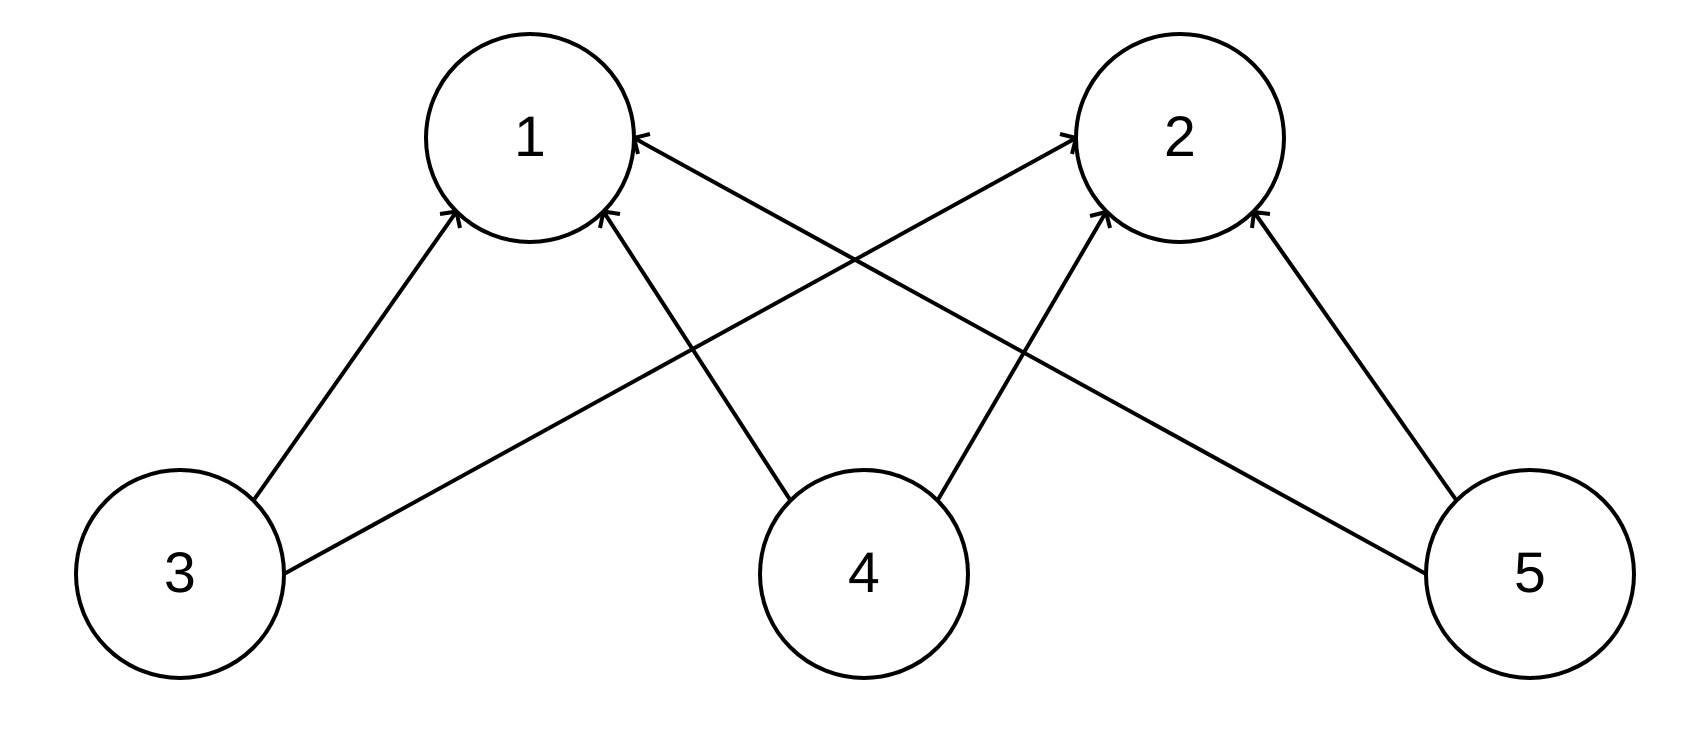

**Conclusion:**
* Hub: **Page 3, 4, 5 are hubs** as they all have out-links.
* Authority: **Page 1, 2 are authorities** as they all have in-links.


---

**Part 1 - Solution #3.B**

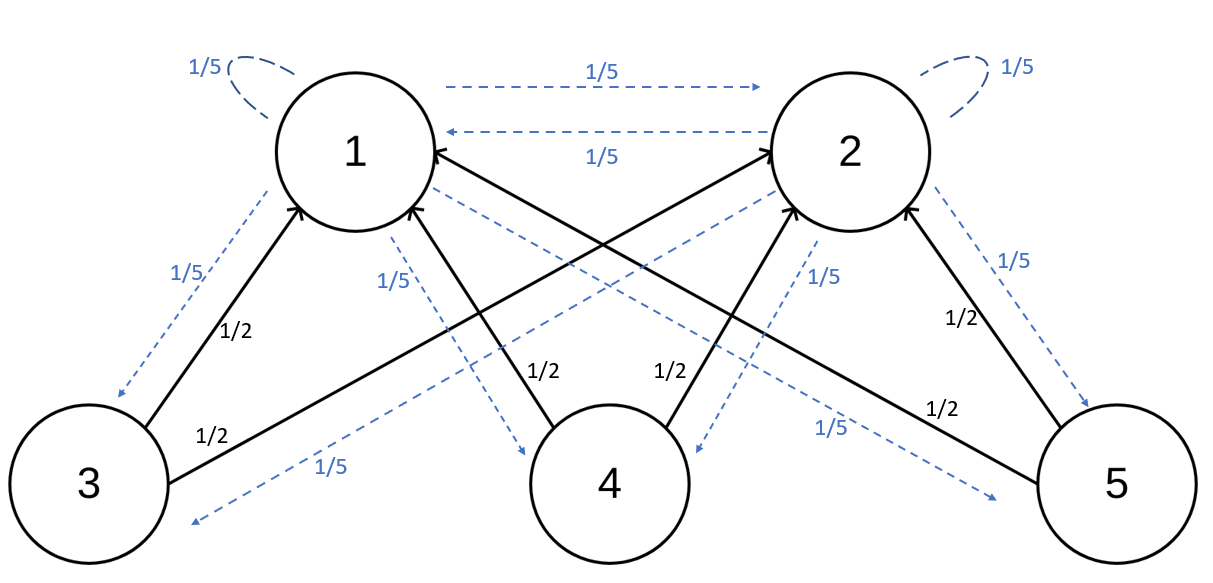

Transition probabilities is calculates as $p_{ji} = 1/|Out(j)| $

Page 1: as there are 5 outlink for this Page to each of the other node, the probablity transition are as follows
> $P_{11}=1/5, P_{12}=1/5, P_{13}=1/5, P_{14}=1/5, p_{15}=1/5$

Page 2: as there are 5 outlink for this Page to each of the other node, the probablity transition are as follows
> $P_{21}=1/5, P_{22}=1/5, P_{23}=1/5, P_{24}=1/5, p_{25}=1/5$

Page 3: as there are 2 outlink for this Page to page 1 & 2, the probablity transition are as follows
> $P_{31}=1/2, P_{32}=1/2, P_{33}=0, P_{34}=0, p_{35}=0$

Page 4: as there are 2 outlink for this Page to page 1 & 2, the probablity transition are as follows
> $P_{41}=1/2, P_{42}=1/2, P_{43}=0, P_{44}=0, p_{45}=0$

Page 5: as there are 2 outlink for this Page to page 1 & 2, the probablity transition are as follows
> $P_{51}=1/2, P_{52}=1/2, P_{53}=0, P_{54}=0, p_{55}=0$



---

**Part 1 - Solution #3.C**

PageRank $\pi(i)$ for all nodes, where $i=\{1,...,5\}$, the page rank is calculated as 

$\pi(i) = \frac{α}{N} + (1- α) \sum_{j \in In(i)}\pi(i) . p_{ji}$ 

**Answer:**

$\pi(1) = \frac{α}{5}+(1- α)(\pi(1) . p_{11} + \pi(2) . p_{21} +\pi(3) . p_{31} +\pi(4) . p_{41} +\pi(5) . p_{51}) = \frac{α}{5}+(1- α)(\frac{\pi(1)}{5} + \frac{\pi(2)}{5} +\frac{\pi(3)}{2} +\frac{\pi(4)}{2} +\frac{\pi(5)}{2})$ 


$\pi(2) = \frac{α}{5}+(1- α)(\pi(1) . p_{12} + \pi(2) . p_{22} +\pi(3) . p_{32} +\pi(4) . p_{42} +\pi(5) . p_{52}) = \frac{α}{5}+(1- α)(\frac{\pi(1)}{5} + \frac{\pi(2)}{5} +\frac{\pi(3)}{2} +\frac{\pi(4)}{2} +\frac{\pi(5)}{2})$


$\pi(3) = \frac{α}{5}+(1- α)(\pi(1) . p_{13} + \pi(2) . p_{23} +\pi(3) . p_{33} +\pi(4) . p_{43} +\pi(5) . p_{53}) = \frac{α}{5}+(1- α)(\frac{\pi(1)}{5} + \frac{\pi(2)}{5} +\pi(3)*0 + \pi(4)*0 + \pi(5)*0)
= \frac{α}{5}+(1- α)(\frac{\pi(1)}{5} + \frac{\pi(2)}{5})$


$\pi(4) = \frac{α}{5}+(1- α)(\pi(1) . p_{14} + \pi(2) . p_{24} +\pi(3) . p_{34} +\pi(4) . p_{44} +\pi(5) . p_{54}) = \frac{α}{5}+(1- α)(\frac{\pi(1)}{5} + \frac{\pi(2)}{5} +\pi(3)*0 + \pi(4)*0 + \pi(5)*0)
= \frac{α}{5}+(1- α)(\frac{\pi(1)}{5} + \frac{\pi(2)}{5})$


$\pi(5) = \frac{α}{5}+(1- α)(\pi(1) . p_{15} + \pi(2) . p_{25} +\pi(3) . p_{35} +\pi(4) . p_{45} +\pi(5) . p_{55}) = \frac{α}{5}+(1- α)(\frac{\pi(1)}{5} + \frac{\pi(2)}{5} +\pi(3)*0 + \pi(4)*0 + \pi(5)*0)
= \frac{α}{5}+(1- α)(\frac{\pi(1)}{5} + \frac{\pi(2)}{5})$



---
ASSIGNMENT 4 : PART 2


---


---

**Part 2 - Solution #1.A**

    * Data refers to characteristics that are collected through observation.
    * A dataset can be viewed as a collection of objects.
    * Data objects are described by a number of attributes.
    * An attribute is a characteristic or feature of an object.

**Answer:**

|Tags|attribute|characteristic|collect|data|dataset|describe|feature|object|observe|number|refer|through|view|
|--| -- |--| -- |--| -- |--| -- |--| -- |--|--|--|--|
|Document 1 |0|1|1|1|0|0|0|0|1|0|1|1|0|
|Document 2 |0|0|1|1|1|0|0|1|0|0|0|0|1|
|Document 3 |1|0|0|1|0|1|0|1|0|1|0|0|0|
|Document 4 |1|1|0|0|0|0|1|1|0|0|0|0|0|


---

**Part 2 - Solution #1.B**

The inverse document frequency is caluculated as :<br>
$idf(w) = \log_{10}(|D|/|D_w|)$ , where $|D_w|$ is the number of documents in which the word $w$ occurs,
and $|D|$ is the total number of documents.

**Answer:**

For the document-term matrix formed $|D| = 4$

$idf(attribute)=\log_{10}(4/2)=\log_{10}(2) = 0.30102999566 $

$idf(characteristic)=\log_{10}(4/2)=\log_{10}(2) = 0.30102999566 $

$idf(collect)=\log_{10}(4/2)=\log_{10}(2)= 0.30102999566 $

$idf(data)=\log_{10}(4/3)=\log_{10}(1.3333)=0.12493873661 $

$idf(dataset)=\log_{10}(4/1)=\log_{10}(4) = 0.60205999133$

$idf(describe)=\log_{10}(4/1)=\log_{10}(4) = 0.60205999133$

$idf(feature)=\log_{10}(4/1)=\log_{10}(4) = 0.60205999133$

$idf(object)=\log_{10}(4/3)=\log_{10}(1.3333)=0.12493873661$

$idf(observe)=\log_{10}(4/1)=\log_{10}(4) = 0.60205999133$

$idf(number)=\log_{10}(4/1)=\log_{10}(4) = 0.60205999133$

$idf(refer)=\log_{10}(4/1)=\log_{10}(4) = 0.60205999133$

$idf(through)=\log_{10}(4/1)=\log_{10}(4) = 0.60205999133$

$idf(view)=\log_{10}(4/1)=\log_{10}(4) = 0.60205999133$



---

**Part 2 - Solution #2**

Given TimeSeries data $y = \{0.1, 0.15, 0.2, 0.2, 0.3, 0.4, 0.25, 0.6, 0.5\}$. Timeseries binning using $k=3$ values per bin

From Notes: Let $y_i·k+1...y_i·k+k$ be the timestamps cvalues for the series $t_i·k+1...t_i·k+k$.<br>
The new binned value is: $ y′_{i+1} = \frac { \sum_{r=1}^{k} y_i·k+r}{k}$

So, binning with $k=3$ values per bin:
  * 0.1, 0.15, 0.2 = (0.1 + 0.15 + 0.2) /3 = 0.15
  * 0.2, 0.3, 0.4 = (0.2 + 0.3 + 0.4) / 3 = 0.3
  * 0.25, 0.6, 0.5 = (0.25 + 0.6 + 0.5) / 3 = 0.45

**Answer:** The new timeseries dataset is $y = \{0.15, 0.3, 0.45\} $

---

**Part 2 - Solution #3**

The below code shows the computation of the timeseires data into the Discrete Fourier Transform (DFT) and plots for both the original timeseries and the magnitude of its DFT. 

**Answer: From the analysis of the plot, there are 4 predominant frequency**

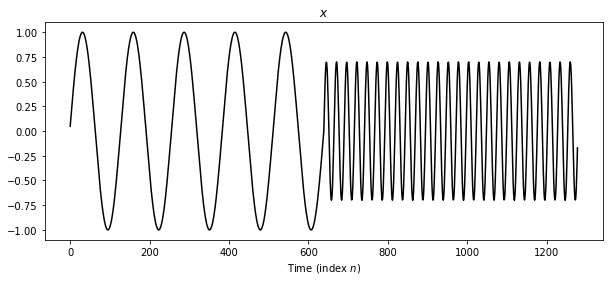

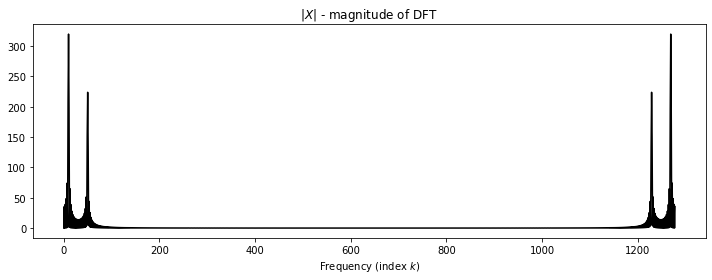

In [71]:
x = np.array(pd.read_csv('timeseries.csv'))
x = x.flatten()

# Plot
plt.figure(figsize=(10, 4))
plt.title('$x$')
plt.plot(x, 'k')
plt.xlabel('Time (index $n$)')

# numpy implementation of FFT
Xfft = np.fft.fft(x)

# Plot
plt.figure(figsize=(10, 4))
plt.title('$|X|$ - magnitude of DFT')
plt.plot(np.abs(Xfft), 'k')
plt.xlabel('Frequency (index $k$)')
plt.tight_layout()

---

**Part 2 - Solution #4**

The below implementation predict daily births for the first 5 days of 1960, using the models below.


In [72]:
series = pd.read_csv('births.csv', header=0, index_col=0)

# Perform trailing moving average smoothing
rolling = series.rolling(window=8) # using a window of 3 samples: t, t-1, t-2, t-3, t-4, t-5, t-6,
rolling_mean = rolling.mean()

print('Original Data:\n', series.head(20))
print('\nSmoothened Data:\n',rolling_mean.head(20))
rolling_mean = rolling_mean.replace(np.nan, 0)

Original Data:
             Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44
1959-01-06      29
1959-01-07      45
1959-01-08      43
1959-01-09      38
1959-01-10      27
1959-01-11      38
1959-01-12      33
1959-01-13      55
1959-01-14      47
1959-01-15      45
1959-01-16      37
1959-01-17      50
1959-01-18      43
1959-01-19      41
1959-01-20      52

Smoothened Data:
             Births
Date              
1959-01-01     NaN
1959-01-02     NaN
1959-01-03     NaN
1959-01-04     NaN
1959-01-05     NaN
1959-01-06     NaN
1959-01-07     NaN
1959-01-08  36.125
1959-01-09  36.500
1959-01-10  35.875
1959-01-11  36.875
1959-01-12  37.125
1959-01-13  38.500
1959-01-14  40.750
1959-01-15  40.750
1959-01-16  40.000
1959-01-17  41.500
1959-01-18  43.500
1959-01-19  43.875
1959-01-20  46.250


 * **AR model with $p=2$**

In [109]:
data = np.array(rolling_mean['Births'])

# Fit Autoregressive model
model = AutoReg(data, lags=2 ,old_names=False) # "lags" indicates the model order
model_fit = model.fit()

# Make prediction
yhat = model_fit.predict(len(data), len(data)+4) # arguments denote which dataset indices to predict
print('AR Model-First five birth in 1960',yhat)

AR Model-First five birth in 1960 [44.51026288 44.24744641 44.01442127 43.80953005 43.62944242]


* **ARMA model with $p=2$ and $q=2$**

In [110]:
data = np.array(rolling_mean['Births'])

# Fit ARMA model
model = ARIMA(data, order=(2, 0, 2)) # p=2, q=2
model_fit = model.fit()

# Make prediction
yhat = model_fit.predict(len(data), len(data)+4) # arguments denote which dataset indices to predict
print('ARMA Model-First five birth in 1960:',yhat)

ARMA Model-First five birth in 1960: [44.64666619 44.50649319 44.36428527 44.22869272 44.09218908]


---

**Part 2 - Solution #5**

The below code implements document clustering using k-means on the following wikipedia articles.


In [111]:
articles=['anomaly detection', 'cluster analysis', 'k-means clustering', 'Data mining', 'data warehouse', 'Association rule learning']
article_list=[]
title=[]

# Load wikipedia articles
for article in articles:
   article_list.append(wikipedia.page(article,auto_suggest=False).content)
   title.append(article)


In [76]:
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(article_list) # Create tf-idf feature of the wikipedia dataset
print(X.shape) # Print dimensions of tf-idf feature

(6, 3521)


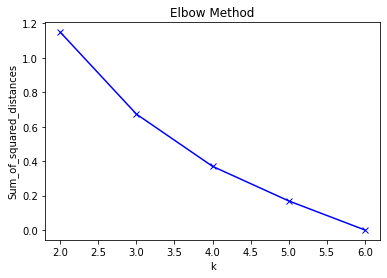

In [77]:
Sum_of_squared_distances = []
K = range(2,7)

for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

**Analysis**: From the elbow method, it can be seen that at k=3 there is a dent, So no. of cluster to be considered as 3. 

In [78]:
# Fit k-means model with k=3
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)

# Print list of documents and associated clusters
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                       title  cluster
0          anomaly detection        0
1           cluster analysis        1
2         k-means clustering        1
5  Association rule learning        1
3                Data mining        2
4             data warehouse        2


**Conclusion**: From the report it can concluded that, 
* Document with words Cluster Analysis, K-means Clustering, Association Rule Learning belong to the same cluster. 
* Document with Data Mining, Data Warehouse belong to the same cluster.
* Document with article Analmoly detetction belongs to another cluster.